Import used packages

In [1]:
from algorithms import *
import numpy as np

In [2]:
# Define both data paths
circle_path = 'Circle.csv'
spiral_path = 'Spiral.csv'

# Load the Circle data set
data_circle = np.loadtxt(circle_path, delimiter=',')
X_circle = data_circle[:, :2]

# Load the Spiral data set
data_spiral = np.loadtxt(spiral_path, delimiter=',')
X_spiral = data_spiral[:, :2]
labels_spiral = data_spiral[:, 2]

Define Global Variables

In [3]:
sigma = 1
k = 10

Construct Similarity Graph for both Circle and Spiral

In [4]:
# Try several values of k = 10, 20, 40. Use σ = 1
W_circle = construct_similarity_graph(X_circle, k=k, sigma=sigma)
W_spiral = construct_similarity_graph(X_spiral, k=k, sigma=sigma)

Compute Percentage of non-zero elements:

In [5]:
c_percentage = percentage_nonzero(W_circle)
s_percentage = percentage_nonzero(W_spiral)

print("Percentage of non-zero elements (Circle): {:.2f}%".format(c_percentage))
print("Percentage of non-zero elements (Spiral): {:.2f}%".format(s_percentage))


Percentage of non-zero elements (Circle): 2.19%
Percentage of non-zero elements (Spiral): 5.91%


Compute Degree matrix D and the Laplacian matrix L = D − W (sparse format storage)

In [6]:
# Laplacian for Circle
L_circle_sparse, D_circle_sparse, W_circle_sparse = construct_laplacian(W_circle)

# Laplacian for Spiral
L_spiral_sparse, D_spiral_sparse, W_spiral_sparse = construct_laplacian(W_spiral)

Compute the number of connected components of the similarity graph

In [7]:
# Compute number of connected components for Circle
circle_num_components = compute_num_components(L_circle_sparse)
print("Number of connected components (Circle): ", circle_num_components)

# Compute number of connected components for Spiral
spiral_num_components = compute_num_components(L_spiral_sparse)
print("Number of connected components (Spiral): ", spiral_num_components)

Number of connected components (Circle):  1
Number of connected components (Spiral):  1


###### If the number of connected components is equal to 1, it indicates that the graph is fully connected, and all its vertices are interconnected.

 Compute some small eigenvalues of L and use their values to choose a
suitable number of clusters M for the points data-sets

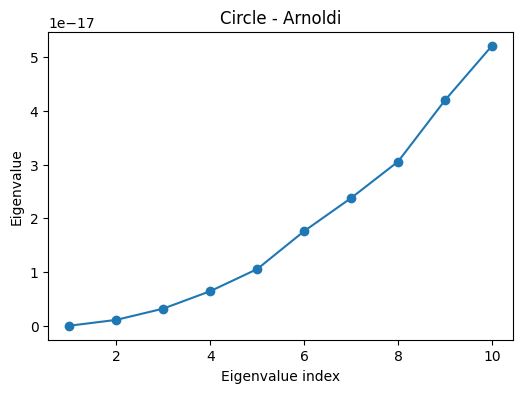

Number of clusters for Circle using Arnoldi algorithm: 8


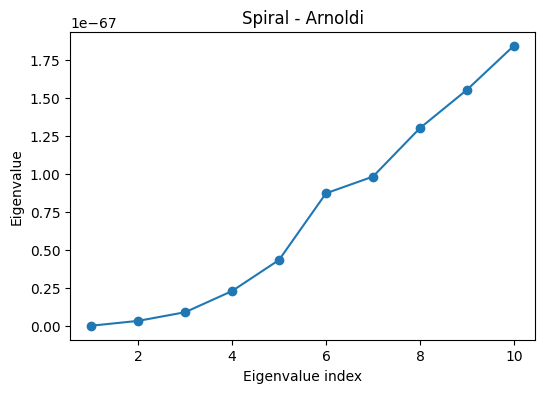

Number of clusters for Spiral using Arnoldi algorithm: 5


In [9]:
Circle_eigvals,Circle_eigvecs = compute_eigen(L_circle_sparse, k = 10)
Circle_num_clusters = num_cluster(Circle_eigvals, k=10,title='Circle' )
Spiral_eigvals, Spiral_eigvecs = compute_eigen(L_spiral_sparse, k=10)
Spiral_num_clusters = num_cluster(Spiral_eigvals, k=10, title='Spiral' )


###### In general, power iteration and Lanczos methods are iterative methods that can converge slowly or not at all for certain matrices, particularly for matrices with multiple eigenvalues close to each other or with a wide range of eigenvalues. On the other hand, shift-invert and implicitly restarted Arnoldi methods are often more robust and better suited for sparse matrices with non-uniform eigenvalue distribution.

Exercise 5- Compute the M eigenvectors u1, ..., uM ∈ RN that correspond to the M smallest eigenvalues of the Laplacian matrix, and define the matrix U ∈ R N×M with these vectors as columns.

In [11]:
Circle_eigvals,Circle_eigvecs = compute_eigen(L_circle_sparse, k = Circle_num_clusters)
Spiral_eigvals, Spiral_eigvecs = compute_eigen(L_spiral_sparse, k=Spiral_num_clusters)

# Define the matrix Circle_U with the eigenvectors of L_circle_sparse as columns
Circle_U = np.stack([Circle_eigvecs[:, i] for i in range(Circle_num_clusters)], axis=1)

# Define the matrix Spiral_U with the eigenvectors of L_spiral_sparse as columns
Spiral_U = np.stack([Spiral_eigvecs[:, i] for i in range(Spiral_num_clusters)], axis=1)


((900, 8), (312, 5))